In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("E:\Machine Learning\Data Sets/mall customers - mall customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df = df.drop('CustomerID', axis=1)

In [5]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [6]:
df = df.rename(columns = {'Gender':'gender', 'Age':'age','Annual Income (k$)':'income','Spending Score (1-100)':'score'})

In [7]:
df.head()

,gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [8]:
df1 = df.copy()
df2 = df.copy()

In [9]:
df.describe()

,age,income,score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# **Visualization**

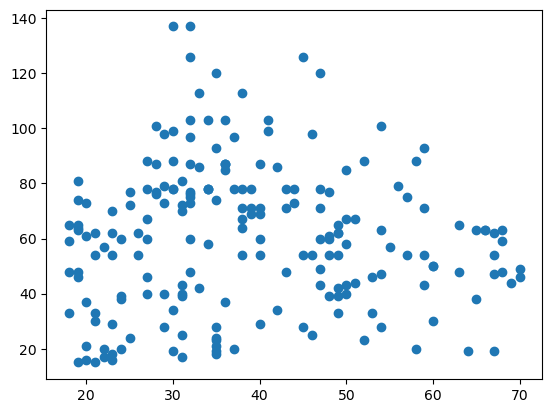

In [10]:
plt.scatter(df.age , df.income)

Text(0.5, 1.0, 'Age and Score plot')

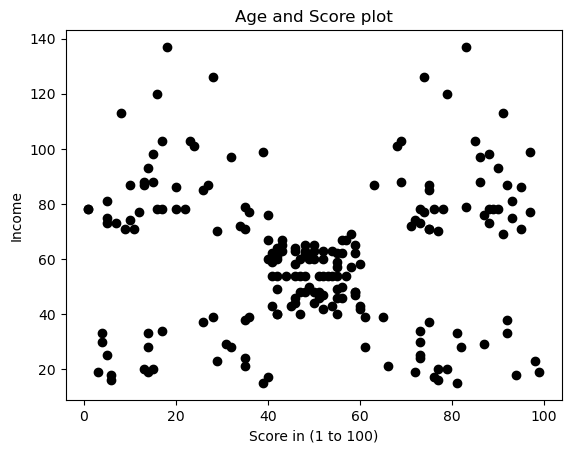

In [11]:
plt.scatter(df.score , df.income, color='black')
plt.xlabel('Score in (1 to 100)')
plt.ylabel('Income')
plt.title('Age and Score plot')

# pairplot

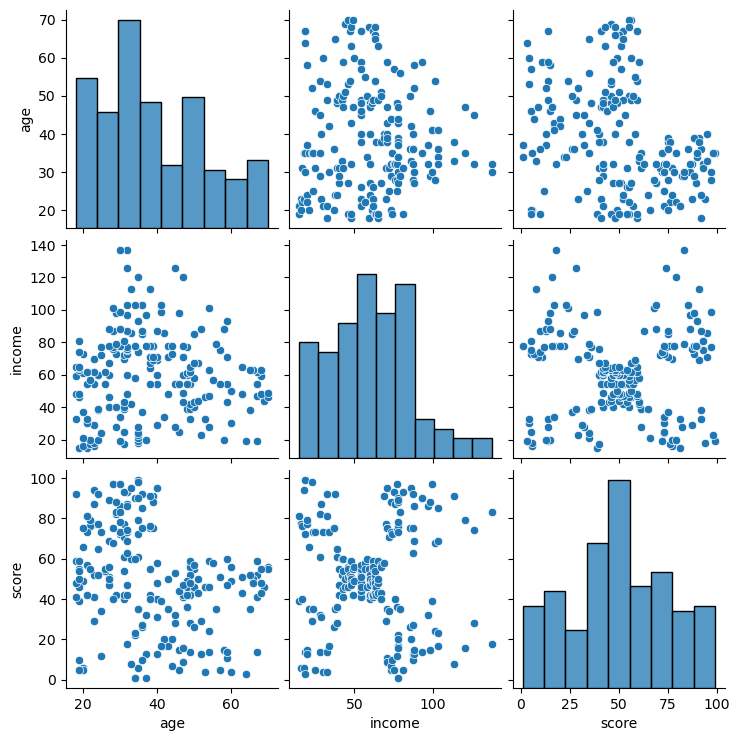

In [12]:
sns.pairplot(df[['age','income','score']])

Text(0.5, 1.0, 'Age and Score plot')

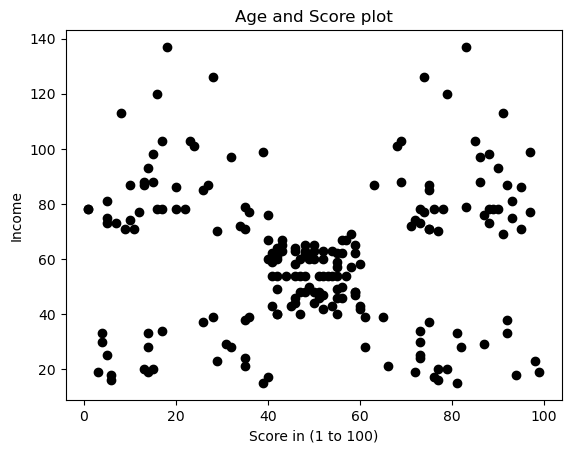

In [14]:

plt.scatter(df.score , df.income, color='black')
plt.xlabel('Score in (1 to 100)')
plt.ylabel('Income')
plt.title('Age and Score plot')

# K-Means Cluster

In [15]:
from sklearn.cluster import KMeans

In [16]:
km = KMeans(n_clusters=8)

In [17]:
km.fit(df[['income','score']])

  File "C:\Users\USER\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\USER\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\anaconda3\Lib\subprocess.py",

KMeans()

In [18]:
df.head()

,gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [19]:
df['new_clusters'] =  km.predict(df[['income','score']])
df.head()

,gender,age,income,score,new_clusters
0,Male,19,15,39,3
1,Male,21,15,81,1
2,Female,20,16,6,3
3,Female,23,16,77,1
4,Female,31,17,40,3


In [20]:
df.tail()

,gender,age,income,score,new_clusters
195,Female,35,120,79,6
196,Female,45,126,28,5
197,Male,32,126,74,6
198,Male,32,137,18,5
199,Male,30,137,83,6


In [21]:
df0 = df[df.new_clusters == 0]

In [22]:
df0.shape

(28, 5)

In [23]:
df0 = df[df.new_clusters == 0]
df1 = df[df.new_clusters == 1]
df2 = df[df.new_clusters == 2]
df3 = df[df.new_clusters == 3]
df4 = df[df.new_clusters == 4]
df5 = df[df.new_clusters == 5]
df6 = df[df.new_clusters == 6]
df7 = df[df.new_clusters == 7]

In [24]:
df7.shape

(19, 5)

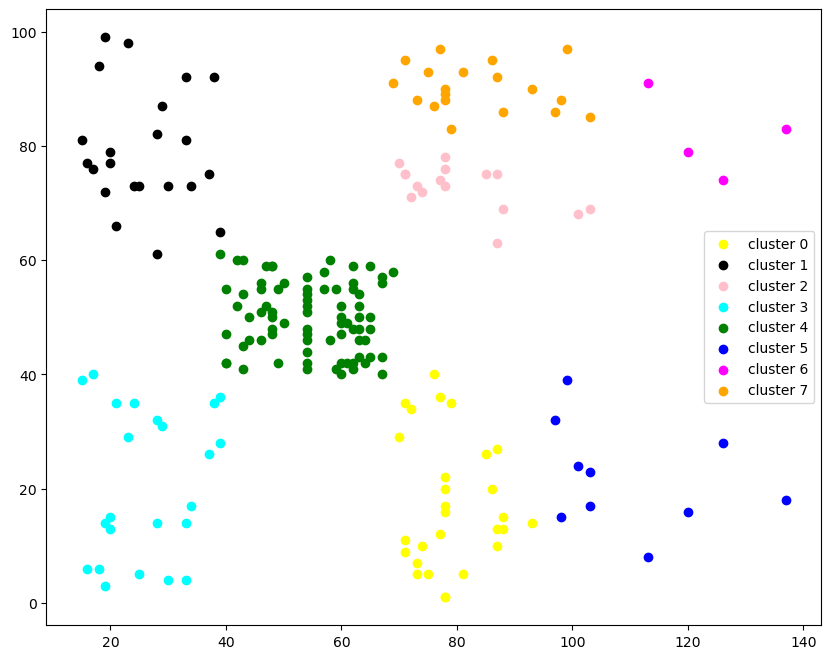

In [25]:
plt.figure(figsize=(10,8))
plt.scatter(df0.income, df0.score, color='yellow', label='cluster 0')
plt.scatter(df1.income, df1.score, color='black', label='cluster 1')
plt.scatter(df2.income, df2.score, color='pink', label='cluster 2')
plt.scatter(df3.income, df3.score, color='cyan', label='cluster 3')
plt.scatter(df4.income, df4.score, color='green', label='cluster 4')
plt.scatter(df5.income, df5.score, color='blue', label='cluster 5')
plt.scatter(df6.income, df6.score, color='magenta', label='cluster 6')
plt.scatter(df7.income, df7.score, color='orange', label='cluster 7')

plt.legend()
plt.show()

In [26]:
cen1 = km.cluster_centers_
cen1

array([[ 78.89285714,  17.42857143],
       [ 25.72727273,  79.36363636],
       [ 80.8125    ,  72.6875    ],
       [ 26.30434783,  20.91304348],
       [ 54.61538462,  50.02564103],
       [109.7       ,  22.        ],
       [124.        ,  81.75      ],
       [ 83.47368421,  90.15789474]])

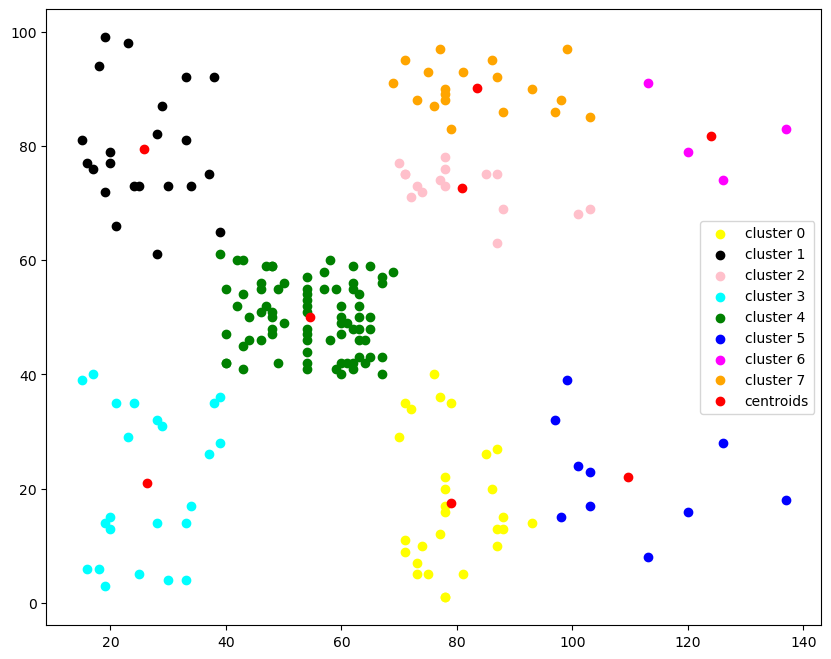

In [27]:
plt.figure(figsize=(10,8))
plt.scatter(df0.income, df0.score, color='yellow', label='cluster 0')
plt.scatter(df1.income, df1.score, color='black', label='cluster 1')
plt.scatter(df2.income, df2.score, color='pink', label='cluster 2')
plt.scatter(df3.income, df3.score, color='cyan', label='cluster 3')
plt.scatter(df4.income, df4.score, color='green', label='cluster 4')
plt.scatter(df5.income, df5.score, color='blue', label='cluster 5')
plt.scatter(df6.income, df6.score, color='magenta', label='cluster 6')
plt.scatter(df7.income, df7.score, color='orange', label='cluster 7')

plt.scatter(cen1[:,0] , cen1[:,1], color='red', label='centroids')

plt.legend()
plt.show()

# Optimizing KMeans

In [28]:
wcss = []
cluster_range = range(1,15)
for k in cluster_range:
    km2 = KMeans(n_clusters=k)
    km2.fit(df[['income','score']])
    wcss.append(km2.inertia_)

In [29]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 41635.31203973372,
 31925.31662765529,
 25095.703209997548,
 21850.165282585636,
 22833.46365820366,
 18906.268618957543,
 16089.226223442389,
 14540.088464763809,
 13940.25975690976]

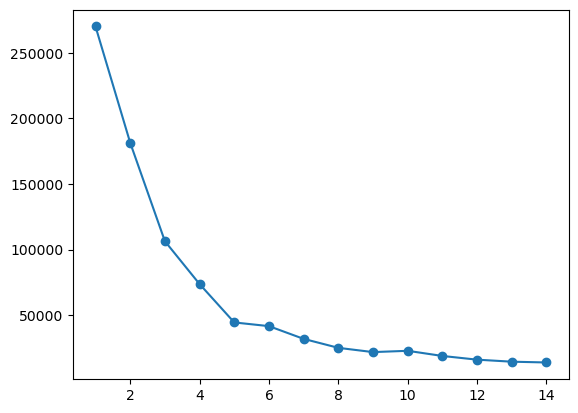

In [30]:
plt.plot(cluster_range, wcss,marker='o')

In [31]:
!pip install kneed

In [32]:
from kneed import KneeLocator

In [33]:
kn = KneeLocator(cluster_range, wcss, direction='decreasing', curve='convex')

In [34]:
kn

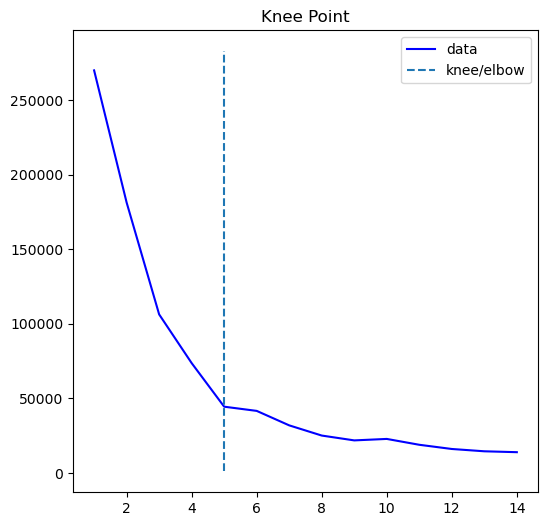

In [35]:
kn.plot_knee()

In [36]:
df.head()

,gender,age,income,score,new_clusters
0,Male,19,15,39,3
1,Male,21,15,81,1
2,Female,20,16,6,3
3,Female,23,16,77,1
4,Female,31,17,40,3


# After Elbow

In [37]:
km = KMeans(n_clusters=5)

In [38]:
df['new_clusters'] = km.fit_predict(df[['income','score']])

In [39]:
df.head()

,gender,age,income,score,new_clusters
0,Male,19,15,39,1
1,Male,21,15,81,4
2,Female,20,16,6,1
3,Female,23,16,77,4
4,Female,31,17,40,1


In [40]:
cen2 = km.cluster_centers_
cen2

array([[86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [55.0875    , 49.7125    ],
       [87.75      , 17.58333333],
       [25.72727273, 79.36363636]])

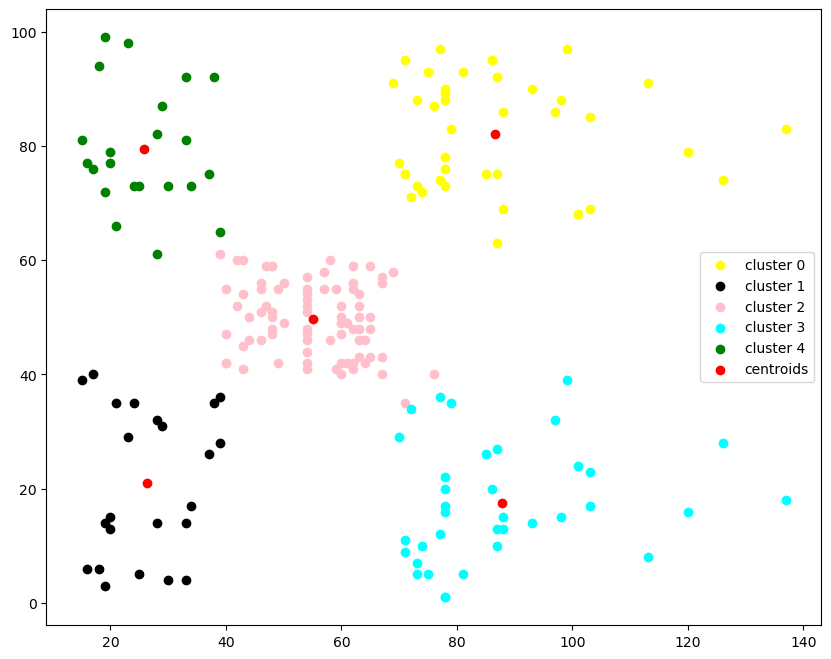

In [41]:
df0 = df[df.new_clusters == 0]
df1 = df[df.new_clusters == 1]
df2 = df[df.new_clusters == 2]
df3 = df[df.new_clusters == 3]
df4 = df[df.new_clusters == 4]

plt.figure(figsize=(10,8))
plt.scatter(df0.income, df0.score, color='yellow', label='cluster 0')
plt.scatter(df1.income, df1.score, color='black', label='cluster 1')
plt.scatter(df2.income, df2.score, color='pink', label='cluster 2')
plt.scatter(df3.income, df3.score, color='cyan', label='cluster 3')
plt.scatter(df4.income, df4.score, color='green', label='cluster 4')

plt.scatter(cen2[:,0] , cen2[:,1], color='red', label='centroids')

plt.legend()
plt.show()

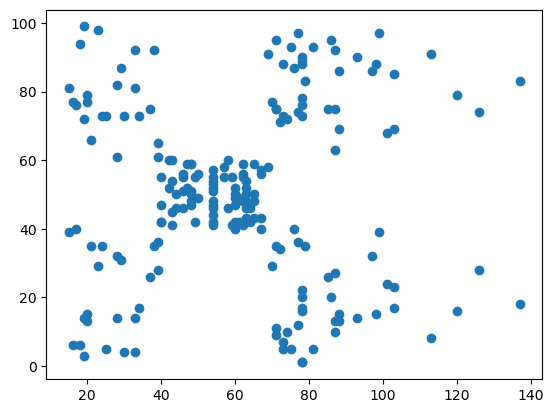

In [42]:
plt.scatter(df.income, df.score)

In [43]:
km.predict([[18, 40]])

array([1], dtype=int32)